In [1]:
from datasets.dataModule import CustomDataModule

In [2]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import cv2
import os

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
# faster rcnn model이 포함된 library
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from torch.utils.data import DataLoader, Dataset
import pandas as pd
from tqdm import tqdm

# for EDA
import matplotlib.pyplot as plt
import PIL
import torchvision.transforms as transforms
from PIL import ImageFont, ImageDraw, Image

# Tensorboard
import torch
from torch.utils.tensorboard import SummaryWriter

In [3]:

customDataModule = CustomDataModule(batch_size = 4)
customDataModule.setup()

train_loader = customDataModule.train_dataloader()
val_loader = customDataModule.val_dataloader()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
images, target = next(iter(train_loader))

here 12
{'id': 1, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Multiple_Categories/', 'width': 887, 'height': 595, 'file_name': 'H_2707.99-1000_01_135.png'}
here 12
{'id': 2, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Multiple_Categories/', 'width': 595, 'height': 345, 'file_name': 'H_2707.99-1000_01_145.png'}
here 12
{'id': 7, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Multiple_Other/', 'width': 834, 'height': 569, 'file_name': 'H_2707.99-1000_02_108.png'}
here 11
{'id': 8, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Multiple_Other/', 'width': 626, 'height': 461, 'file_name': 'H_2707.99-1000_02_118.png'}
here 12
here 12{'id': 14, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Single_Default/', 'width': 493, 'height': 544, 'file_name': 'H_2707.99-1000_02_195.png'}
{'id': 9, 'dataset_id': 0, 'path': '/Astrophysics/ZippoOil/Multiple_Categories/', 'width': 867, 'height': 561, 'file_name': 'H_2707.99-1000_02_135.png'}

here 12
{'id': 10, 'dataset_id': 0, 'path': '/As

In [11]:
type(images)

tuple

In [12]:
target

({'boxes': tensor([[ 524.,  773.,  681.,  930.],
          [ 938.,  632., 1058.,  767.]]),
  'labels': tensor([33, 33]),
  'image_id': tensor([0])},
 {'boxes': tensor([[ 732.,  831., 1000., 1047.],
          [ 831.,  774., 1038.,  849.],
          [ 782.,  633.,  946.,  725.],
          [ 584.,  648.,  732.,  721.],
          [ 659.,  745.,  818.,  805.]]),
  'labels': tensor([ 4, 23, 34, 33, 33]),
  'image_id': tensor([1])},
 {'boxes': tensor([[620., 728., 661., 818.],
          [537., 657., 599., 878.],
          [838., 747., 986., 858.],
          [765., 593., 840., 750.],
          [651., 783., 821., 922.]]),
  'labels': tensor([14, 27, 29, 33, 33]),
  'image_id': tensor([2])},
 {'boxes': tensor([[865., 748., 932., 917.]]),
  'labels': tensor([33]),
  'image_id': tensor([3])})

tensor(33)
tensor(33)
tensor(4)
tensor(23)
tensor(34)
tensor(33)
tensor(33)
tensor(14)
tensor(27)
tensor(29)
tensor(33)
tensor(33)
tensor(33)


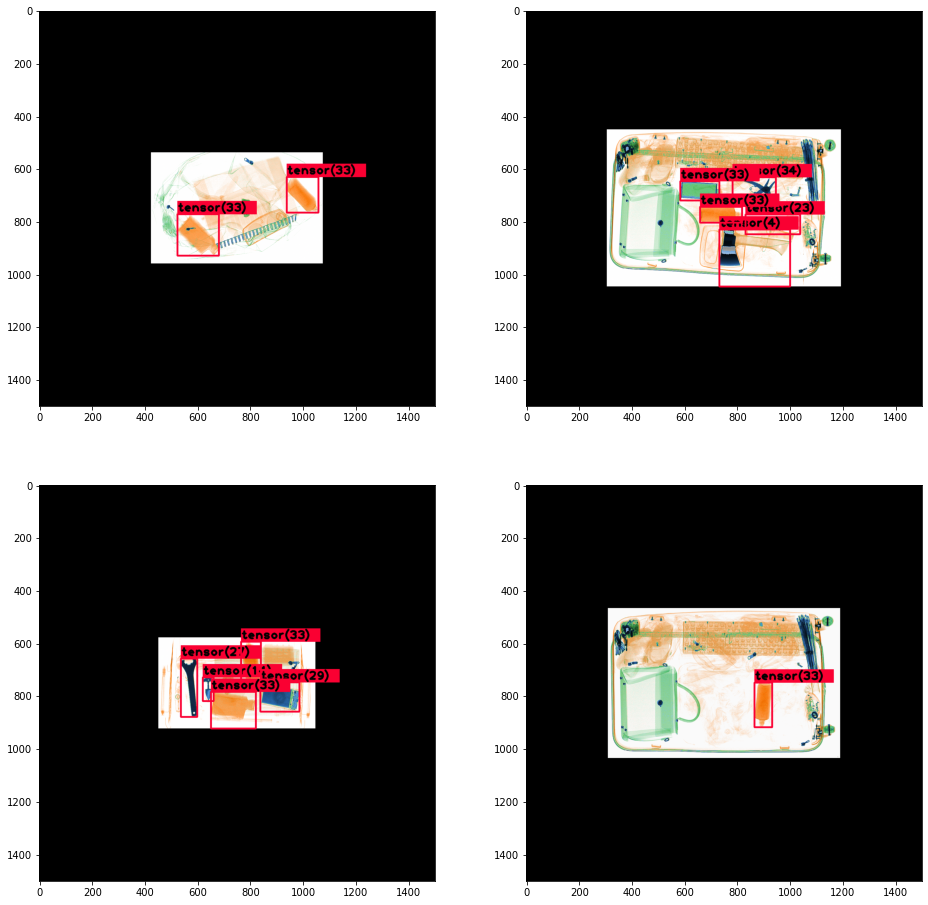

In [8]:

import random

plt.figure(figsize=(16,16))
for i in range(4):

    im = images[i].permute(1, 2, 0).numpy()
    im = (im * 255).astype(np.uint8)

    for j in range(len(target[i]['labels'])):

        label_idx = target[i]['labels'][j]
        box = list(map(int, target[i]['boxes'][j]))
        cv2.rectangle(im, (box[0], box[1]), (box[2], box[3]), (250,0,50), 5)

        text = str(target[i]['labels'][j])  
        print(text)
        cv2.rectangle(im, (box[0], box[1] - 50), (box[0] + 300, box[1]), (250,0,50), -1)
        cv2.putText(im, text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,0), 5, cv2.LINE_AA)

        plt.subplot(2, 2, i+1)
        # plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
        plt.imshow(im)